<h1>Содержание проекта<span class="tocSkip"></span></h1>

1  Цели и задачи проекта

2  Загрузка и обработка данных

    2.1  Загрузка, изучение
    2.2  Общая обработка

3  Обучение и проверка модели

    3.1  Подготовка к обучению
        3.1.1  Исследование признаков и класса
        3.1.2  Подготовка датасетов

3.2  Обучение моделей

4  Подготовка к расчёту прибыли

5  Расчёт прибыли и рисков

6  Общий вывод

# Выбор локации для скважины

## Цели и задачи проекта

**Описание:** Вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.<br/>Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

**Задачи:**
- Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.
- Проанализируйте возможную прибыль и риски техникой *Bootstrap.*
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Шаги для выбора локации:
- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.


**План выполнения работ:**
- Загрузить, изучить и обработать данные;
- Обучить и проверить модель для каждого региона;
- Подготовить данные для расчётов прибыли;
- Посчитать риски и прибыль для каждого региона;
- Сделать общий вывод.

In [1]:
# импорты и настройки

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', str)
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt 
import seaborn as sb

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# для оценки времени
from tqdm.auto import tqdm

# остальное
import warnings
warnings.filterwarnings('ignore')
randomstate = 3103

## Загрузка и обработка данных

### Загрузка, изучение

**Загрузим данные и посмотрим с чем имеем дело**


------------------------------

/datasets/geo_data_0.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.7057449842080644,-0.4978225001976334,1.22116994843607,105.28006184349584
1,2acmU,1.3347112926051892,-0.3401642528583136,4.3650803324282,73.03775026515737
2,409Wp,1.0227322634721168,0.1519904445702294,1.4199262386740652,85.26564713099945
3,iJLyR,-0.0321716245074397,0.1390327081844774,2.978565966320484,168.62077555509563
4,Xdl7t,1.988431059439699,0.1554126777766717,4.751769119262962,154.03664673738086


Распределение числовых столбцов датасета /datasets/geo_data_0.csv в виде гистрограмм


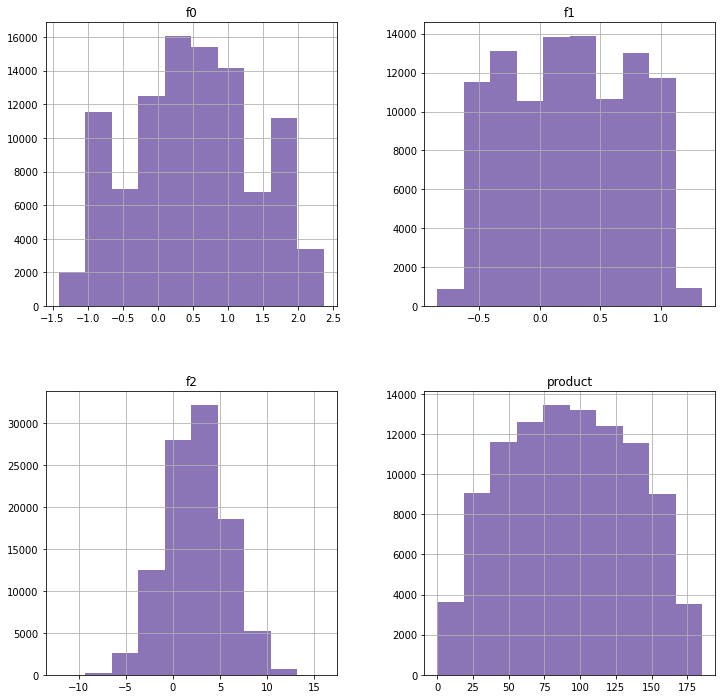


------------------------------

/datasets/geo_data_1.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.00134818249185,-8.275999947188001,-0.0058760136933206,3.179102583207246
1,62mP7,14.272087811011149,-3.47508321506002,0.9991827365665829,26.95326103153969
2,vyE1P,6.263187352448809,-5.948385788285711,5.001160160764809,134.76630515769844
3,KcrkZ,-13.081196289023516,-11.506056864519604,4.999414898074921,137.94540774090564
4,AHL4O,12.702194885533585,-8.147433374146587,5.00436255224226,134.76630515769844


Распределение числовых столбцов датасета /datasets/geo_data_1.csv в виде гистрограмм


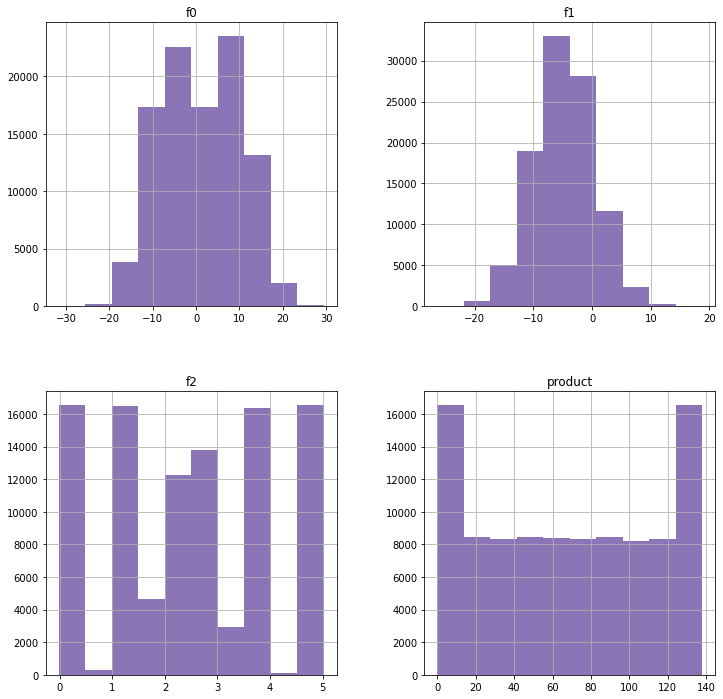


------------------------------

/datasets/geo_data_2.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.1469870984179529,0.9633279217162892,-0.8289649221710994,27.75867323073004
1,WJtFt,0.2627779016539684,0.2698389572803021,-2.530186515492004,56.06969663239464
2,ovLUW,0.1945872816586574,0.2890350017576741,-5.586432770903118,62.87191004763475
3,q6cA6,2.2360596126935817,-0.5537598999099264,0.930037615920042,114.57284166750858
4,WPMUX,-0.5159928644136754,1.7162655596688288,5.899011469346728,149.60074591275887


Распределение числовых столбцов датасета /datasets/geo_data_2.csv в виде гистрограмм


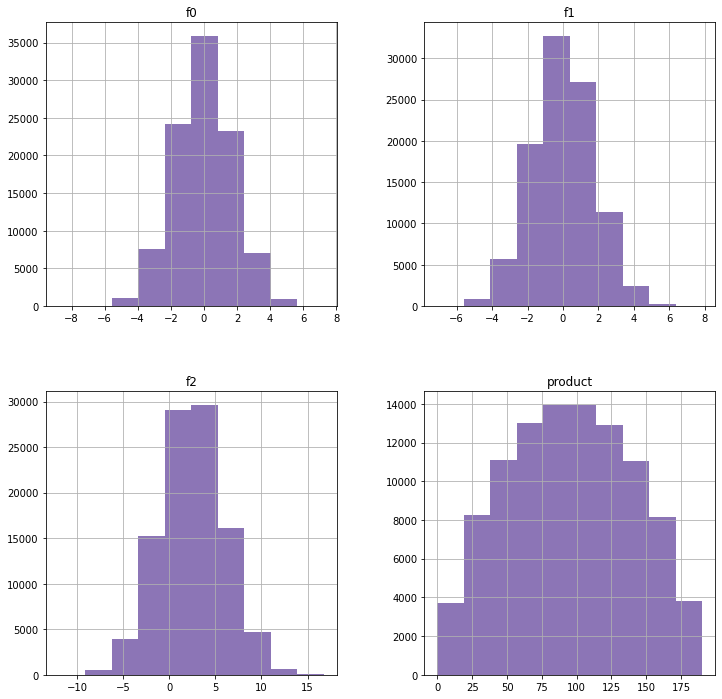

In [2]:
# датасеты
data = []
for i in range(3):
    dsname = f'/datasets/geo_data_{i}.csv'
    data.append(pd.read_csv(dsname))
    print();print('-'*30);print();print(dsname);print()
    display(data[i].info());
    display(data[i].head());
    print(f'Распределение числовых столбцов датасета {dsname} в виде гистрограмм')
    data[i].hist(figsize=(12, 12), color = "#8c75b6");plt.show();

Выше мы видим общую информацию о трех датасетах, выделим следующее:

**Признаки:**
- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек (неизвестно что это, но они важны по условию задачи);

**Целевой признак (класс):**
- `product` — объём запасов в скважине (тыс. баррелей).

Отметим, что во всех датасетах нет отсутствующих данных.

Все признаки у нас числовые.

В признаках значения распределены нормально, судя по графикам, в классе тоже,<br/>однако обратим внимание на то что в geo_data_1.csv есть судя по всему выбросы на минимальных и максимальных значениях.

### Общая обработка

**Избавимся от лишнего, проверим дубликаты и т.д.**

**Посмотрим на дубликаты:**

In [3]:
for i in range(len(data)):
    print(f'\nДатасет geo_data_{i}\nКоличество явных дубликатов: {sum(data[i].duplicated())}\n')


Датасет geo_data_0
Количество явных дубликатов: 0


Датасет geo_data_1
Количество явных дубликатов: 0


Датасет geo_data_2
Количество явных дубликатов: 0



Как мы знаем,
- `id` — уникальный идентификатор скважины;

Проверим на всякий случай.

In [4]:
for i in range(len(data)):
    print();print('Уник.id:',len(data[i]['id'].unique()),'из',len(data[i]))


Уник.id: 99990 из 100000

Уник.id: 99996 из 100000

Уник.id: 99996 из 100000


Довольно интересная ситуация заключается в том, что id это идентификатор скважины.

По идее он должен быть уникален, но мы видим, что возможно есть повторы. Посмотрим.


In [5]:
for i in range(len(data)):
    print(f'geo_data{i}.csv')
    
    bool_dubl = data[i].duplicated(subset=['id'])
    print('Дублированных id:',bool_dubl.sum())
    data_dubl = data[i][bool_dubl]
    
    for dubl_id in data_dubl['id']:
        same = data[i][data[i]['id'] == dubl_id]
        display(same)

geo_data0.csv
Дублированных id: 10


,id,f0,f1,f2,product
931,HZww2,0.7552842271635848,0.3685114788822029,1.8632112215902232,30.681774496542783
7530,HZww2,1.0611938695991008,-0.3739690837175021,10.430210258820283,158.82869521700235


,id,f0,f1,f2,product
1364,bxg6G,0.4116449402873586,0.8568302740326846,-3.653440019025573,73.6042595114848
41724,bxg6G,-0.8237518238988432,0.5463185091794397,3.630479360955368,93.0077980092532


,id,f0,f1,f2,product
3389,A5aEY,-0.0399487484568592,0.1568723773179921,0.209861015490383,89.24936421830995
51970,A5aEY,-0.1803353225635459,0.935548406802054,-2.09477267781693,33.02020507254836


,id,f0,f1,f2,product
1949,QcMuo,0.5065629480927571,-0.3237747395909756,-2.2155833211989613,75.4965022591358
63593,QcMuo,0.6356346484574112,-0.4734216444166717,0.8626697299520634,64.57867535059826


,id,f0,f1,f2,product
64022,74z30,0.7414563896165806,0.4592294654856754,5.153108660509534,140.7714923753712
66136,74z30,1.0849621430609833,-0.3123577141663048,6.990771006574128,127.64332680328752


,id,f0,f1,f2,product
42529,AGS9W,1.4547473615130813,-0.4796514244044363,0.6833796370174312,126.37050434823638
69163,AGS9W,-0.9337950254255925,0.1161940975427075,-3.6558962908396535,19.2304533179062


,id,f0,f1,f2,product
21426,Tdehs,0.8294065169753866,0.2988070381468724,-0.0495627225934587,96.03530757983
75715,Tdehs,0.1120786739116989,0.4302964640220232,3.218992710153172,60.96401824063864


,id,f0,f1,f2,product
16633,fiKDv,0.1573410012809789,1.0283587757772097,5.5855859931099126,95.81788929059958
90815,fiKDv,0.0498831472068193,0.8413126816526011,6.39461267465025,137.34658636134


,id,f0,f1,f2,product
60140,TtcGQ,0.5692761848642621,-0.1048764127649315,6.4402147611281375,85.35018598385602
92341,TtcGQ,0.1107107061861431,1.022688833053036,0.9113807546379776,101.31800767111528


,id,f0,f1,f2,product
89582,bsk9y,0.3989080680654323,-0.400252744293225,10.122376364040676,163.43307824343646
97785,bsk9y,0.378428779393484,0.0058365400286942,0.1608272207855412,160.6373017834086


geo_data1.csv
Дублированных id: 4


,id,f0,f1,f2,product
1305,LHZR0,11.170834886932989,-1.9450656077624449,3.002872334532632,80.85978309461906
41906,LHZR0,-8.989671871716311,-4.286607075142498,2.0091389966332125,57.08562464628662


,id,f0,f1,f2,product
2721,bfPNe,-9.494441881351934,-5.463692106350644,4.0060415819144986,110.992146709366
82178,bfPNe,-6.202798994370619,-4.820044564815392,2.995107206596672,84.03888567782631


,id,f0,f1,f2,product
47591,wt4Uk,-9.091097645682114,-8.109278921040683,-0.0023136991985505,3.179102583207246
82873,wt4Uk,10.259972397061716,-9.376354819569784,4.994296692628419,134.76630515769844


,id,f0,f1,f2,product
5849,5ltQ6,-3.435400655682741,-12.296043363689575,1.9997955405525067,57.08562464628662
84461,5ltQ6,18.213838953157858,2.1919987531641767,3.993869295751548,107.81304412615876


geo_data2.csv
Дублированных id: 4


,id,f0,f1,f2,product
28039,xCHr8,1.633027398872861,0.3681346146986521,-2.37836744238992,6.120525198275293
43233,xCHr8,-0.8470657155169228,2.101796125258357,5.5971304106656135,184.3886413724209


,id,f0,f1,f2,product
11449,VF7Jo,2.1226558570597063,-0.8582750218117161,5.7460011622286284,181.71681716776263
49564,VF7Jo,-0.8831152345244617,0.5605365063301919,0.7236006233090237,136.23341953948022


,id,f0,f1,f2,product
45404,KUPhW,0.2318463212163305,-1.6989411200541402,4.99077473402697,11.71629903187472
55967,KUPhW,1.2111504969333158,3.1764081825798742,5.54353969863736,132.83180203624136


,id,f0,f1,f2,product
44378,Vcm5J,-1.22948409371565,-2.43920363300028,1.2229085644127935,137.9682903642638
95090,Vcm5J,2.5877022015401687,1.9868750030562543,2.4822448030879936,92.32757215224984


Показания дублированных по id строк очень разнятся, при этом, правильным решением будет от них избавиться.
И затем, с учетом того, что признак id не является для нас ценными данными, сразу избавимся и от него.

In [6]:
for i in range(len(data)):
    data[i].drop_duplicates(subset=['id'], keep=False, inplace=True)
    data[i].drop(['id'], axis=1, inplace=True)
    data[i] = data[i].reset_index(drop=True)

**На данном этапе изучение и предобработка завершены. Выводы:**
- Данные загружены и просмотрены, определены признаки и класс.
- Признак `id` удален, так как от него класс не может зависеть.

## Обучение и проверка модели

### Подготовка к обучению

#### Исследование признаков и класса

Т.к. данные мы не изменяли, то заново выводить общую информацию и графики распределения не будем.

Посмотрим на корреляцию признаков, и класса:

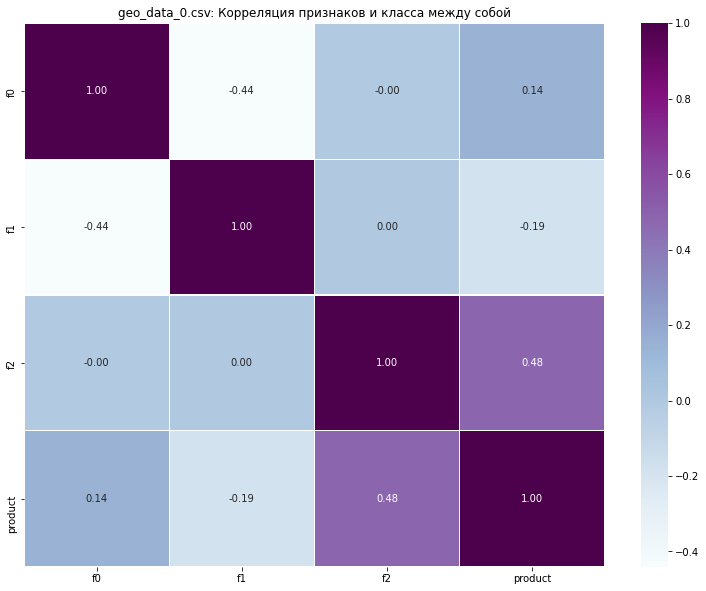

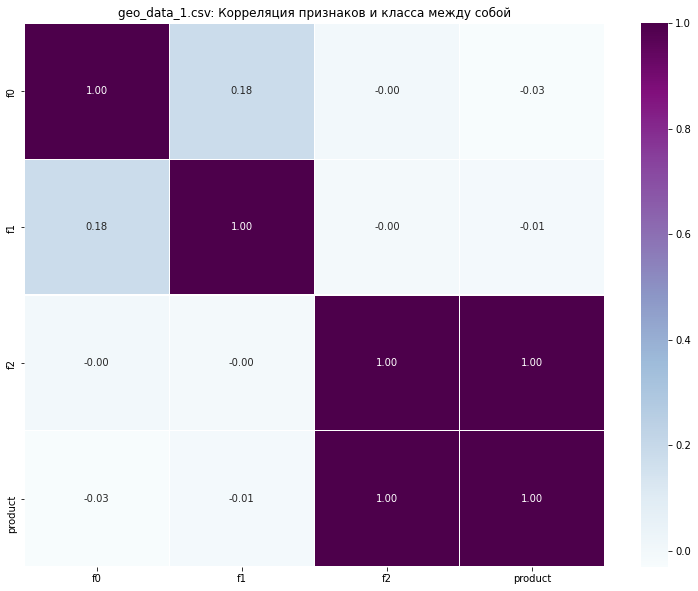

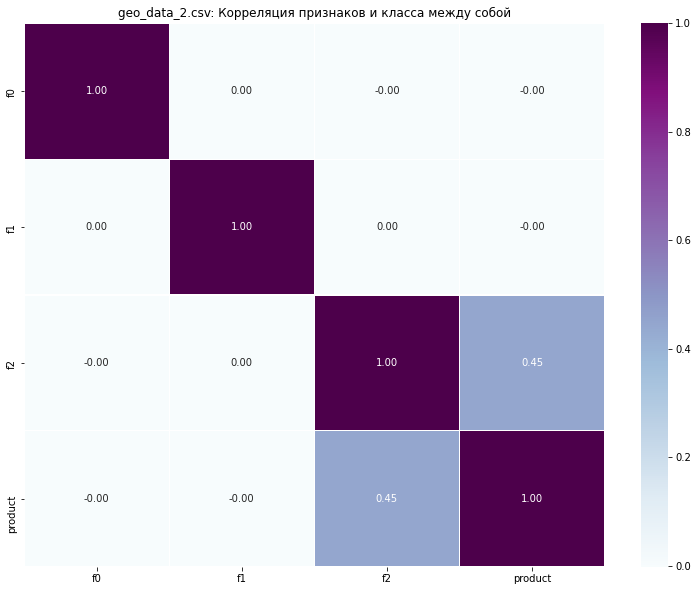

In [7]:
for i in range(len(data)):
    fig, ax = plt.subplots(figsize=(13,10))
    sb.heatmap(data[i].corr(), cmap="BuPu", annot=True, fmt='.2f', linewidth=.1);
    plt.title(f'geo_data_{i}.csv: Корреляция признаков и класса между собой')
    plt.show();

**Как мы видим:**
- в geo_data_0 признаки коррелируют в пределах -0.48 друг с другом, обратим на это внимание;
- в geo_data_1 наблюдается 100% корреляция признака f2 с классом, это хорошо в целом;
- в geo_data_2 тоже f2/product наблюдается, но в уже в меньшей мере (0.45), это тоже в целом хорошо.

#### Подготовка датасетов

**По условию задачи нам необходимо разбить обучающую и валидационную выборки в соотношении 75% и 25%.**

In [8]:
# разобьем, посмотрим, запишем
features_train = []; features_val = []
target_train = []; target_val = []
for i in range(len(data)):
        
    # разобьем данные на признаки и целевое значение
    features = data[i].drop(['product'], axis=1)
    target = data[i]['product']

    # разделим данные на train, test
    _features_train, _features_val, _target_train, _target_val = train_test_split(
        features, target, test_size=0.25, random_state=randomstate
    )
    features_train.append(_features_train)
    features_val.append(_features_val)
    target_train.append(_target_train)
    target_val.append(_target_val)
    
    print();print(f'geo_data_{i}.csv Размеры выборок:')
    print(f'Обучающая (train): {features_train[i].shape[0]} строк,',
          round(features_train[i].shape[0]/data[i].shape[0]*100,2),'%')
    print(f'Валидационная (valid): {features_val[i].shape[0]} строк,',
          round(features_val[i].shape[0]/data[i].shape[0]*100,2),'%')


geo_data_0.csv Размеры выборок:
Обучающая (train): 74985 строк, 75.0 %
Валидационная (valid): 24995 строк, 25.0 %

geo_data_1.csv Размеры выборок:
Обучающая (train): 74994 строк, 75.0 %
Валидационная (valid): 24998 строк, 25.0 %

geo_data_2.csv Размеры выборок:
Обучающая (train): 74994 строк, 75.0 %
Валидационная (valid): 24998 строк, 25.0 %


**Выводы:**
- Исследовали корреляцию признаков и класса
- - В одном датасете два признака довольно значимо коррелируют друг с другом;
- - В двух датасетах (0.45 и 1.00) признак f2 коррелирует с классом;
- Разбили данные на выборки train/valid в соотношении 75/25%.

Данные готовы для построения моделей.

### Обучение моделей

Для оценки качества моделей мы будем использовать метрику RMSE (квадратный корень из средней квадратичной ошибки).

**Чем меньше RMSE, тем точнее предсказания модели.**

In [9]:
predicted_val = []
df_data = []

for i in range(len(data)):
        
    model = LinearRegression()
    model.fit(features_train[i], target_train[i])
    predicted = model.predict(features_val[i])
    
    mse = mean_squared_error(target_val[i], predicted)
    rmse = mse ** 0.5
    mae = mean_absolute_error(target_val[i], predicted)
    
    predicted = pd.Series(predicted,index=list(target_val[i].index))
    
    # делаем series и индекс из валид. таргет
    predicted_val.append(predicted)
    
    df_data.append([
        f'Регион #{i}',
        rmse,
        mae
    ])

df = pd.DataFrame(df_data, columns=['Регион','Ошибка RMSE','Ошибка тыс.баррелей (MAE)'])
print('Результаты построения моделей Linear Regression по трём регионам:')
display(df.style.hide_index())

Результаты построения моделей Linear Regression по трём регионам:


Регион,Ошибка RMSE,Ошибка тыс.баррелей (MAE)
Регион #0,37.608124,30.970728
Регион #1,0.890515,0.717383
Регион #2,40.051121,32.784450


**Вывод:** построили модели для каждого региона, вывели ошибку RMSE и MAE, сохранили результаты.

Как мы видим, минимальная ошибка во втором регионе, где, как мы помним, была 100% корреляция одного из признаков с классом.

## Подготовка к расчёту прибыли

Нам необходимо рассчитать достаточный объём сырья для безубыточной разработки новой скважины.

И сравнить полученный объём сырья со средним запасом в каждом регионе. 

**Условия задачи:**
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Обозначим переменные:

In [10]:
# кол-во точек
tochek_find = 500
tochek_budet = 200

# 1 точка дохода *1000
tochka_dohod = 450*1000

# бюджет 10 млрд
budget = 10**10

Посчитаем сколько минимально нужно добывать из одной скважины, чтобы было безубыточно.

In [11]:
tochka_minimum_objem = budget / (tochek_budet * tochka_dohod)
print(f'Минимальный объём с одной скважины для безубыточной разработки: {tochka_minimum_objem:.2f} тыс.бар.')

Минимальный объём с одной скважины для безубыточной разработки: 111.11 тыс.бар.


In [12]:
for i in range(len(data)):
    _mean = data[i]['product'].mean()
    print(f'Средний запас сырья в Регионе #{i} равен {_mean:.2f} тыс.бар.')

Средний запас сырья в Регионе #0 равен 92.50 тыс.бар.
Средний запас сырья в Регионе #1 равен 68.82 тыс.бар.
Средний запас сырья в Регионе #2 равен 95.00 тыс.бар.


**Вывод:**
- Минимальный объём с одной скважины для безубыточной разработки: 111.11 тыс.бар.
- Ни в одном регионе средний запас сырья (92.50,68.83,95.00 тыс.бар) не превышает минимальный нужный нам объем,<br/>значит нужно искать лучшие скважины.

In [13]:
# функции (хоть их и надо после import, но по инструкции в этом пункте)

## функция расчета прибыли с N точек в регионе
def model_profit(target_val, predicted, tochek_budet, tochka_dohod, budget):
    if(list(target_val.index)!=list(predicted.index)):
        print('Индексы не совпадают!')
    if(len(target_val)!=len(predicted)):
        print('Кол-ва не совпадают!')
    
    # сортируем наше предсказанное
    predicted_sorted = predicted.sort_values(ascending=False)
    # берем по нашим индексам из реальных
    predicted_best_tochki = target_val[predicted_sorted.index][:tochek_budet]
    # считаем прибыль
    pred_sum = predicted_best_tochki.sum()
    dohod = (tochka_dohod * pred_sum)
    model_profit = dohod - budget
    return model_profit

## функиця бустрап
def model_profits_bootstrap(target_val,predicted_val,tochek_find,tochek_budet,tochka_dohod,budget):
    
    np_randomstate = np.random.RandomState(randomstate)
    
    values = []

    for i in range(1000):
        
        # делаем сэмплы по таргету
        target_subsample = target_val.sample(n=tochek_find, replace=True, random_state=np_randomstate)
        probs_subsample = predicted_val[target_subsample.index] 
        
        # у нас могут быть дубли по индексу в predicted из-за сэмпла
        # при этом по факту поиндексу строки совпадают, значит мы можем сбросить индекс
        target_subsample.reset_index(drop=True,inplace=True)
        probs_subsample.reset_index(drop=True,inplace=True)
        
        profit = model_profit(
            target_subsample, # реальные данные из валидационной выборки
            probs_subsample, # предсказанные моделью данные валид.
            tochek_budet,
            tochka_dohod,
            budget
        )
        
        values.append(profit)
    
    return pd.Series(values)

## Расчёт прибыли и рисков 

**Посчитаем прибыль и риски для каждого региона.**

In [14]:
pbar = tqdm(total=len(predicted_val))
# считаем прибыли бутстрап
profits_val = []

for i in range(len(predicted_val)):
    
    profit = model_profits_bootstrap(
        target_val[i],
        predicted_val[i],
        tochek_find,
        tochek_budet,
        tochka_dohod,
        budget
    )
    profits_val.append(profit)
    
    pbar.update()
pbar.close()

  0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
# выводим данные
for i in range(len(profits_val)):
    
    print(f'Регион #{i}')
    
    low_95 = profits_val[i].quantile(0.025)
    high_95 = profits_val[i].quantile(0.0975)
    mean = profits_val[i].mean()
    
    riski = (profits_val[i] < 0).mean() * 100
    
    print("Средняя прибыль:", mean)
    print(f"95%-доверительный интервал: {low_95:.2f} , {high_95:2f}")
    print(f"Риски: {riski:.2f}%")
    
    print('-'*50);print()

Регион #0
Средняя прибыль: 434652108.2688705
95%-доверительный интервал: -98048976.35 , 98122340.840295
Риски: 4.90%
--------------------------------------------------

Регион #1
Средняя прибыль: 440680254.20268744
95%-доверительный интервал: 23235652.79 , 178753895.616946
Риски: 1.60%
--------------------------------------------------

Регион #2
Средняя прибыль: 338503190.93763125
95%-доверительный интервал: -164303397.69 , -6910848.415627
Риски: 10.10%
--------------------------------------------------



**Вывод:**
- Произвели расчет прибыли, рисков, 95% дов. интервалов по каждому региону.
- Риски <2.5% только у одного региона 1. Его и выбираем, т.к. подходит под условия задачи.

## Общий вывод

**1. Мы изучили цели и задачи проекта:**

Вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.<br/>Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

- Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.
- Проанализируйте возможную прибыль и риски техникой *Bootstrap.*
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

**2. Загрузили и подготовили данные:**
- Во всех датасетах нет отсутствующих данных. Все признаки числовые.
- В признаках значения распределены нормально, в классе тоже.
- Обнаружили и обработали дубликаты по столбцу id (уник.идент.скважины).

**3. Обучили и проверили модели по каждому региону:**
- Подготовились к обучению:
- - Проверили корреляцию признаков и класса (в двух датасетах (0.45 и 1.00) признак f2 коррелирует с классом);
- - Подготовили выборки по каждому региону (75/25%) для обучающей и валидационной;
- Обучили модели LinearRegression по каждому региону:
- - По региону 0: Ошибка RMSE 37.6;
- - По региону 1: Ошибка RMSE 0.90;
- - По региону 2: Ошибка RMSE 40.0;
- Сохранили результаты.

**4. Подготовились к расчету прибыли:**
- Проверили объемы добычи и определили:
- - Минимальный объём с одной скважины для безубыточной разработки: 111.11 тыс.бар.
- - Средний объем сырья ни в одном регионе не превышает минимальный, поэтому нужны лучшие скважины.
- Определили переменные в соответствии с условиями задачи, такими как:
- - Количество выбираемых скважин: 200 из 500;
- - Доход с одной скважины: 450 тыс.
- - Бюджет на всё: 10 млрд.
- Написали функции для:
- - Расчета прибыли по спрогнозированным значениям;
- - Перебора (bootstrap) 1000 вариаций выборок 500 скважин

**5. Рассчитали прибыль, риски, и выбрали регион:**
- Посчитали прибыль и риски по каждому региону:
- - По региону 0: Риски: 4.90%, Средняя прибыль: 434.7 млн;
- - По региону 1: Риски: 1.60%, Средняя прибыль: 440.7 млн;
- - По региону 2: Риски: 10.1%, Средняя прибыль: 338.5 млн;
- Выбрали регион 1 (риски <2.5% только в этом регионе).

**Общий вывод:**

Рекомендуем к разработе Регион 1, с показателями:

Средняя прибыль: 440.7 млн<br/>95%-дов. интервал: 23.2 млн. - 178.8 млн.<br/>Риски: 1.6%

Что соответствует поставленным условиям задачи.